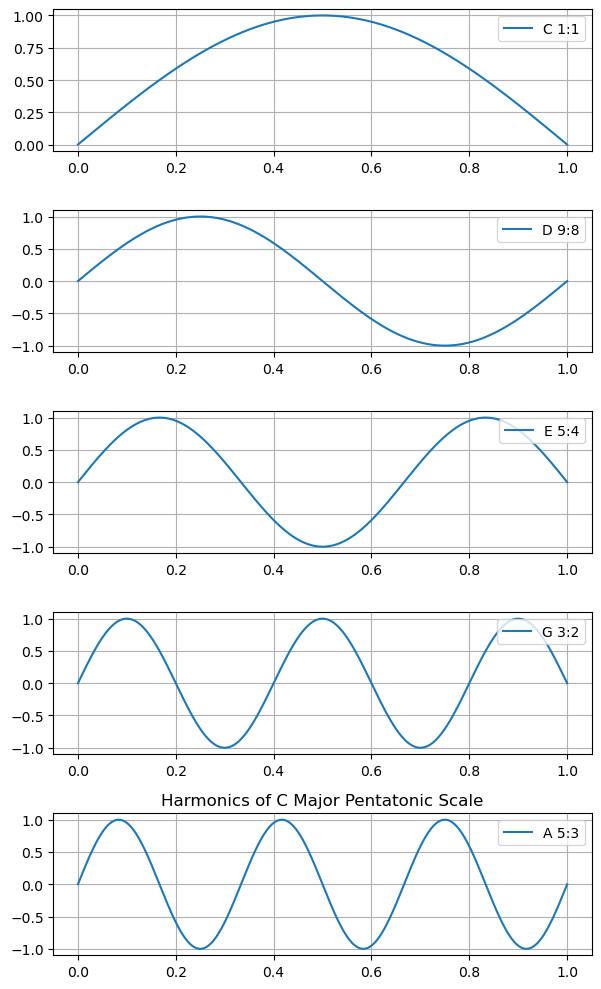

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

# Parameters for our string
L = 1  # String length
x = np.linspace(0, L, 1000)  # Spatial positions

# Number of harmonics to plot
num_harmonics = 5
harmonics = {
    "C 1:1": 261.63*1,
    "D 9:8": 261.63*(9/8),
    "E 5:4": 261.63*(5/4),
    "G 3:2": 261.63*(3/2),
    "A 5:3": 261.63*(5/3)
}

# Loop over each harmonic and create a list of waveforms
note = [np.sin(n * np.pi * x / L) for n in range(1, 9)]
harm = [note[0], note[1], note[2], note[4], note[5]]

fig, axs = plt.subplots(5, 1, figsize=(6, 10))
plt.title("Harmonics of C Major Pentatonic Scale")
# Loop over each harmonic waveform in `harm` list and plot
for idx, (waveform, note_name) in enumerate(zip(harm, harmonics.keys())):
    axs[idx].plot(x, waveform, label=note_name)
    axs[idx].legend(loc='upper right')
    axs[idx].grid(True)

plt.tight_layout()
plt.show()

In [17]:
t = np.linspace(0,1, 44100, False)
## Can set ff = 261.63 for other keys
# Generate a richer sound for the C note by adding harmonics
frequencies = {
    "C": 261.63*1,
    "D": 261.63*(9/8),
    "E": 261.63*(5/4),
    "G": 261.63*(3/2),
    "A": 261.63*(5/3),
    "C2": 261.63*2
}

for note in frequencies.keys():
# Define the fundamental frequency and its harmonics
    sick = frequencies[note]

    harmonics = [2, 3, 4, 5]  # These are multipliers for the fundamental frequency

# Weights for each harmonic (can be adjusted to create different timbres)
    weights = [1.0, 0.5, 0.25, 0.125]

# Generate the waveform with harmonics
    rich_c_note = np.sin(2 * np.pi * sick * t)
    for i, harmonic in enumerate(harmonics):
        rich_c_note += weights[i] * np.sin(2 * np.pi * harmonic * sick * t)

# Normalize the waveform to avoid clipping
    rich_c_note = rich_c_note / np.max(np.abs(rich_c_note))

# Play the richer C note
    display(Audio(rich_c_note, rate=44100))


In [7]:
# Function to create a simpler 2D animation for a single harmonic
def animate_2d_single_harmonic(harmonic_index):
    fig, ax = plt.subplots(figsize=(12, 8))
    note, freq = list(harmonics.items())[harmonic_index]
    x_vals = np.linspace(0, 1/freq, 1000)
    
    line, = ax.plot(x_vals, np.sin(2 * np.pi * freq * x_vals), lw=2, alpha=0.6)

    def animate(i):
        y_vals = np.sin(2 * np.pi * freq * x_vals + i * 0.1)  # Adding a phase shift based on time
        line.set_ydata(y_vals)
        return line,

    ani = FuncAnimation(fig, animate, frames=40, interval=50, blit=True)
    #file_name = f"/mnt/data/2d_harmonic_{harmonic_index + 1}.mp4"
    file_name = r"C:\Users\Integ\OneDrive\Desktop\PDEs\Numerical_PDEs.mp4"
    ani.save(file_name, writer="ffmpeg", fps=20, dpi=150)
    plt.close(fig)
    return file_name

# Animate the first harmonic in 2D
first_2d_harmonic_file = animate_2d_single_harmonic(0)
first_2d_harmonic_file


'C:\\Users\\Integ\\OneDrive\\Desktop\\PDEs\\Numerical_PDEs.mp4'

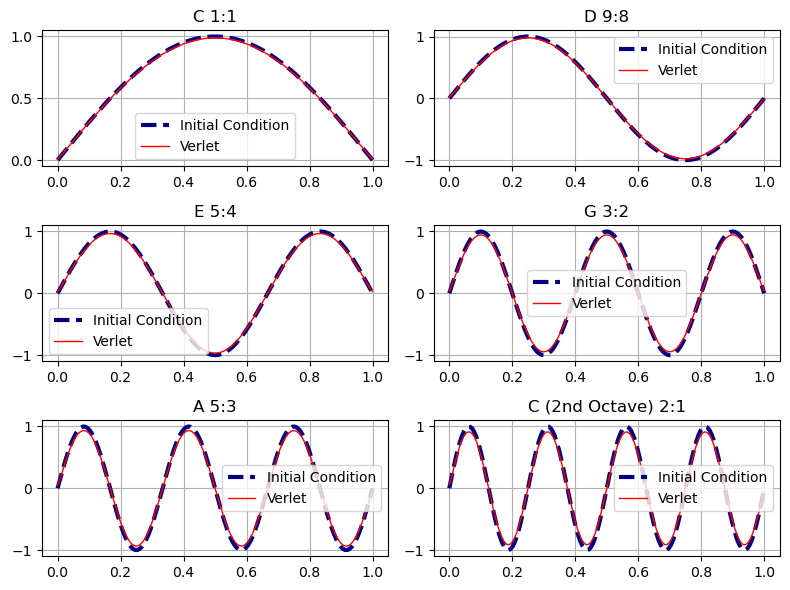

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import dst, idst

# Parameters
N = 150  ### for smoothness baby
L = 1.0
h = L / N
#x = -L / 2 + h * np.arange(0, N) + h / 2  # Ths is going to track displacement
k = np.arange(1, N + 1) * np.pi / L
x = np.linspace(0,1,N)

f1 = 261.63

dt = 0.0001
N_ts = int(1/0.0001)
# Initial condition functions

# Adjusting the code to run for different n values and store the results
harmonics = {
    "C 1:1": 261.63*1,
    "D 9:8": 261.63*(9/8),
    "E 5:4": 261.63*(5/4),
    "G 3:2": 261.63*(3/2),
    "A 5:3": 261.63*(5/3)
}

# Mapping n values to their corresponding harmonic names
n_to_harmonic = {
    1: "C 1:1",
    2: "D 9:8",
    3: "E 5:4",
    5: "G 3:2",
    6: "A 5:3",
    8: "C (2nd Octave) 2:1"  # Adding the 2nd octave C for n=8
}

import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import dst, idst
# Adjusting the code to run for different n values and store the results
harmonics = {
    "C 1:1": 261.63*1,
    "D 9:8": 261.63*(9/8),
    "E 5:4": 261.63*(5/4),
    "G 3:2": 261.63*(3/2),
    "A 5:3": 261.63*(5/3)
}

# Mapping n values to their corresponding harmonic names
n_to_harmonic = {
    1: "C 1:1",
    2: "D 9:8",
    3: "E 5:4",
    5: "G 3:2",
    6: "A 5:3",
    8: "C (2nd Octave) 2:1"  # Adding the 2nd octave C for n=8
}
# Dictionary to store results for each n value
solutions_for_n = {}

for i in range(1, 9):
    
    # Adjusting the initial condition for current n value
    def H0(x, n=i):  # using default argument to capture current value of i
        return np.sin(n * np.pi * x / L)

    def Ht0(x):
        return np.zeros_like(x)
    # Initial conditions in spatial domain
    A0 = H0(x)
    V0 = Ht0(x)
    A0 = H0(x)
    An = dst(A0, type=1)
    Vn = dst(V0, type=1)
    
    # Verlet Integration for current n value
    solutions_verlet_disp = []
    for j in range(N_ts):
        An_new = np.zeros_like(An)
        Vn_new = np.zeros_like(Vn)

        for k in range(1, N+1):
            lambda_k = 2 * np.pi**2 * k * f1
            V_n1 = -lambda_k*dt*An[k-1] + Vn[k-1]
            A_n1 = An[k-1] + dt * V_n1
            An_new[k-1] = A_n1
            Vn_new[k-1] = V_n1

        An, Vn = An_new, Vn_new
        A_spatial = idst(An, type=1)
        solutions_verlet_disp.append(A_spatial)

    # Store the results for current n value in the dictionary
    solutions_for_n[i] = solutions_verlet_disp

fig, axs = plt.subplots(3, 2, figsize=(8, 6))  # 3x2 grid of subplots

# List of n values to plot
n_values = [1, 2, 3, 5, 6, 8]
T = 1 / f1 
# Calculating the half period for the note C

T_half_C = T / 2

# Finding the closest integer time step to T_half_C within our simulation time
TS = int(T_half_C / dt)
# Looping over each subplot and n value to plot the results
for ax, n in zip(axs.ravel(), n_values):
    ax.plot(x, solutions_for_n[n][0], label=f'Initial Condition', linestyle='--', linewidth=3, color = 'navy')
    ax.plot(x, solutions_for_n[n][TS], label=f'Verlet', linewidth=1, color = 'red')
    harmonic_name = n_to_harmonic.get(n, f"n={n}")  # Fallback to "n=value" if no harmonic name is found
    ax.set_title(harmonic_name)
    ax.legend()
    ax.grid(True)

# Adjusting the layout for better spacing
plt.tight_layout()
plt.show()



In [31]:
# Full Code Compilation
import moviepy
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import dst, idst
from scipy.io.wavfile import write
from moviepy.editor import *
from matplotlib.animation import FuncAnimation

# Parameters and Initial Setup
N = 150
L = 1.0
x = np.linspace(0,1,N)
f1 = 261.63
dt = 0.0001
N_ts = int(1/0.0001)
t = np.linspace(0, 1, 44100, False)
frequencies = {
    "C": 261.63*1,
    "D": 261.63*(9/8),
    "E": 261.63*(5/4),
    "G": 261.63*(3/2),
    "A": 261.63*(5/3),
    "C2": 261.63*2
}

# Audio Generation
for note in frequencies.keys():
    sick = frequencies[note]
    harmonics = [2, 3, 4, 5]
    weights = [1.0, 0.5, 0.25, 0.125]
    rich_c_note = np.sin(np.pi * sick * t)
    for i, harmonic in enumerate(harmonics):
        rich_c_note += weights[i] * np.sin(2 * np.pi * harmonic * sick * t)
    rich_c_note = rich_c_note / np.max(np.abs(rich_c_note))

# Save Audio to WAV
def save_audio_to_wav(audio_data, filename):
    write(filename, 44100, audio_data)

audio_file = "rich_c_note.wav"
save_audio_to_wav(rich_c_note, audio_file)

# Animation Function
def animate_2d_single_harmonic(harmonic_index):
    fig, ax = plt.subplots(figsize=(12, 8))
    note, freq = list(frequencies.items())[harmonic_index]
    x_vals = np.linspace(0, 1/freq, 1000)
    line, = ax.plot(x_vals, np.sin(2 * np.pi * freq * x_vals), lw=2, alpha=0.6)

    def animate(i):
        y_vals = np.sin(2 * np.pi * freq * x_vals + i * 0.1)
        line.set_ydata(y_vals)
        return line,

    ani = FuncAnimation(fig, animate, frames=40, interval=50, blit=True)
    file_name = "2d_harmonic_animation.mp4"
    ani.save(file_name, writer="ffmpeg", fps=20, dpi=150)
    plt.close(fig)
    return file_name

first_2d_harmonic_file = animate_2d_single_harmonic(0)

# Embed Audio to Video
def embed_audio_to_video(video_path, audio_path, output_path):
    video = VideoFileClip(video_path)
    audio = AudioFileClip(audio_path)
    video_with_audio = video.set_audio(audio)
    video_with_audio.write_videofile(output_path, audio_codec='aac')

output_video = "video_with_audio.mp4"
embed_audio_to_video(first_2d_harmonic_file, audio_file, output_video)


# End of code. The final video will be saved as "video_with_audio.mp4".

Moviepy - Building video video_with_audio.mp4.
MoviePy - Writing audio in video_with_audioTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video video_with_audio.mp4



Moviepy - Done !
Moviepy - video ready video_with_audio.mp4


'rich_c_note.wav'

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import dst, idst
from scipy.io.wavfile import write
from moviepy.editor import *
from matplotlib.animation import FuncAnimation

# Parameters and Initial Setup
N = 150
L = 1.0
x = np.linspace(0,1,N)
f1 = 261.63
dt = 0.0001
N_ts = int(1/0.0001)
t = np.linspace(0, 1, 44100, False)
frequencies = {
    "C": 261.63*1,
    "D": 261.63*(9/8),
    "E": 261.63*(5/4),
    "G": 261.63*(3/2),
    "A": 261.63*(5/3),
    "C2": 261.63*2
}

# Audio Generation
for note in frequencies.keys():
    sick = frequencies[note]
    harmonics = [2, 3, 4, 5]
    weights = [1.0, 0.5, 0.25, 0.125]
    rich_c_note = np.sin(2 * np.pi * sick * t)
    for i, harmonic in enumerate(harmonics):
        rich_c_note += weights[i] * np.sin(2 * np.pi * harmonic * sick * t)
    rich_c_note = rich_c_note / np.max(np.abs(rich_c_note))

# Save Audio to WAV
def save_audio_to_wav(audio_data, filename):
    write(filename, 44100, audio_data)

audio_file = "rich_c_note.wav"
save_audio_to_wav(rich_c_note, audio_file)

# Animation Function
def animate_2d_single_harmonic(harmonic_index):
    fig, ax = plt.subplots(figsize=(12, 8))
    note, freq = list(frequencies.items())[harmonic_index]
    x_vals = np.linspace(0, 1/freq, 1000)
    line, = ax.plot(x_vals, np.sin(2 * np.pi * freq * x_vals), lw=2, alpha=0.6)

    def animate(i):
        y_vals = np.sin(2 * np.pi * freq * x_vals + i * 0.1)
        line.set_ydata(y_vals)
        return line,

    ani = FuncAnimation(fig, animate, frames=40, interval=50, blit=True)
    file_name = "2d_harmonic_animation_v2.mp4"
    ani.save(file_name, writer="ffmpeg", fps=20, dpi=150)
    plt.close(fig)
    return file_name

first_2d_harmonic_file = animate_2d_single_harmonic(0)

# Embed Audio to Video
def embed_audio_to_video(video_path, audio_path, output_path):
    video = VideoFileClip(video_path)
    audio = AudioFileClip(audio_path)
    video_with_audio = video.set_audio(audio)
    video_with_audio.write_videofile(output_path, audio_codec='aac')

output_video = "vid_and_aud_v2.mp4"
embed_audio_to_video(first_2d_harmonic_file, audio_file, output_video)


Moviepy - Building video vid_and_aud_v2.mp4.
MoviePy - Writing audio in vid_and_aud_v2TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video vid_and_aud_v2.mp4



Moviepy - Done !
Moviepy - video ready vid_and_aud_v2.mp4
